# Predictive Analytics - Liver disease 
### Gibran Faktian Anwar

Sumber Data : 
[Liver Disease: 1700 Records Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset) 

## **Deskripsi Proyek**

### **Deskripsi Latar Belakang Proyek Liver Disease Prediction**


Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi seseorang terkena penyakit liver atau tidak. Saat ini, penentuan seseorang terkena penyakit hati masih dilakukan secara konvensional, memakan waktu, tenaga, dan rentan terhadap human error. Hal ini dapat menyebabkan kerugian terhadap doktor, tenaga medis, pasien dan bahkan owner dari rumah sakit. Model Liver Prediction ini  dapat menjadi solusi yang lebih tepat, efisien, dan mudah dipahami dalam mengatasi masalah ini.

-----------------------

### Import Library yang dibutuhkan

In [1]:
# importing semua library yang dibutuhkan
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


## Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan melihat seberapa baik data itu.

**Dataset Variable Description**

Berdasarkan informasi dari kaggle, berikut arti tiap variablenya:

| **Feature**             | **Description**                      | **Range/Values**                 |
|--------------------------|--------------------------------------|-----------------------------------|
| **Age**                 | Age of the individual               | 20 to 80 years                   |
| **Gender**              | Gender of the individual            | Male or  Female                  |
| **BMI**                 | Body Mass Index                     | 15 to 40                         |
| **Alcohol Consumption** | Weekly alcohol consumption          | 0 to 20 units per week           |
| **Smoking**             | Smoking status                      | No (0) or Yes (1)                |
| **Genetic Risk**        | Genetic predisposition to disease   | Low (0), Medium (1), High (2)    |
| **Physical Activity**   | Weekly physical activity duration   | 0 to 10 hours per week           |
| **Diabetes**            | Diabetes status                     | No (0) or Yes (1)                |
| **Hypertension**        | Hypertension status                 | No (0) or Yes (1)                |
| **Liver Function Test** | Liver enzyme test result            | 20 to 100                        |
| **Diagnosis**           | Liver disease presence indicator    | No (0) or Yes (1)                |


### Memuat dan melihat dataset pada csv lokal menggunakan library Pandas

In [2]:
# load local dataset lalu ditampilkan 10 baris pertama
show_data = pd.read_csv('liver_disease_data.csv')
show_data

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,Male,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,Female,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,Male,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,Female,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,Female,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,Male,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,Male,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,Male,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,Male,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


Dilihat dari output di atas dapat diketahui bahwa dataset ini memiliki 1700 sampel atau baris data dengan 14 kolom.

### Menampilkan informasi yang terkandung

In [3]:
# menampilkan informasi yang terkadung dalam dataset
show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   object 
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 146.2+ KB


Output dari `.info()` memberikan ringkasan informasi tentang dataset yang dimuat. Berguna untuk memahami struktur dataset dengan cepat.

memberikan kita informasi :


*   Terdapat 4 kolom bertipe data float64 dan 7 kolom bertipe data int64
*   Tidak ada kolom yang kosong
*   Kolom Diagnosis merupakan target/label

### Menampilkan statistik deskriptif

In [4]:
# melihat ringkasan statistik dari dataset
show_data.describe()

,Age,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


Fungsi `.describe()` digunakan untuk memberikan statistik deskriptif. Statistik ini memberikan gambaran umum tentang distribusi data dalam setiap kolom numerik untuk melakukan eksplorasi awal.

Informasi yang kita dapat sebagai berikut:

* Count: Jumlah sampel yang terdapat dalam data.
* Mean: Nilai rata-rata setiap kolom.
* Std: Standar deviasi, menunjukkan seberapa besar variasi data.
* Min: Nilai minimum pada setiap kolom.
* 25%: Kuartil pertama, yang merupakan nilai batas bawah dari 25% data terendah.
* 50%: Kuartil kedua atau median, yaitu nilai tengah data.
* 75%: Kuartil ketiga, yang menandai batas atas dari 75% data terendah.
* Max: Nilai maksimum pada setiap kolom.

### Melihat bentuk dataset

In [5]:
# menampilkan bentuk dari dataset yang dipakai
show_data.shape

(1700, 11)

Informasi terkait :

* Memiliki 1700 baris 
* Meiliki 11 kolom

### Mencai Missing Value dan Outliers

Mencari nilai null di tiap kolomnya

In [6]:
null_info = show_data.isnull().sum()
print(null_info)


Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64


dari output diatas dapat disumpulkan bahwa :
* Data ini sudah bersih dari missing value
* Kita tidak perlu menghapus kolom lagi


### Pencarian outlier di tiap fiturnya

Membuat dataframe terlebih dahulu agar mudah untuk di olah

In [7]:
# membuat dataframe dari dataset
df = show_data
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,Male,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,Female,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,Male,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,Female,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,Female,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


outputnya masih sama seprti bisa, namun berbeda variable pemanggilnya saja

### Mengubah nama fitur tiap kolomnya agar lebih mudah dipanggil nantinya

In [8]:
# mengubah baris pertama agar menjadi kecil semua
df.columns = df.columns.str.lower()

### Mencari outliers dari tiap numerik kolumnnya

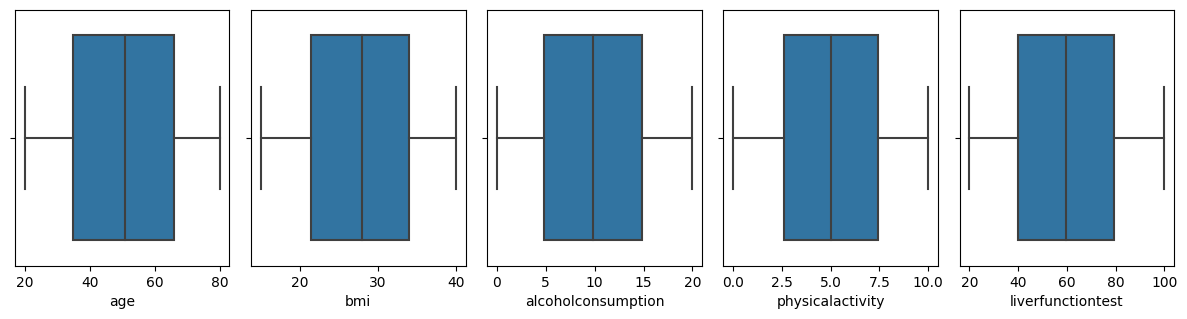

In [9]:
num_columns = ['age', 'bmi', 'alcoholconsumption', 'physicalactivity', 'liverfunctiontest']

# menampilkan boxplot outlier dari masing-masing koloom
plt.figure(figsize=(12, 6))
for i, column in enumerate(num_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[column])
plt.tight_layout()
plt.show()

Dari output diatas dapat disimpulkan bahwa :

* Tidak ditemukanya satu pun outlier ditiap kolomnya
* Data ini sudah bersih dari outlier dari sejak pengambilan

### Pencarian Data Duplicated

In [10]:
# Mencari duplikat pada seluruh dataset
duplicates = show_data.duplicated()
print(show_data[duplicates])

Empty DataFrame
Columns: [age, gender, bmi, alcoholconsumption, smoking, geneticrisk, physicalactivity, diabetes, hypertension, liverfunctiontest, diagnosis]
Index: []


Dari output disana dapat dilihat bahwa :

* Dataset ini tidak memiliki duplikat
* Data ini sudah bersih dari duplikat dari semenjak didownload

### Data Visualization

Menampilkan sebaran data dari feature diagnosis

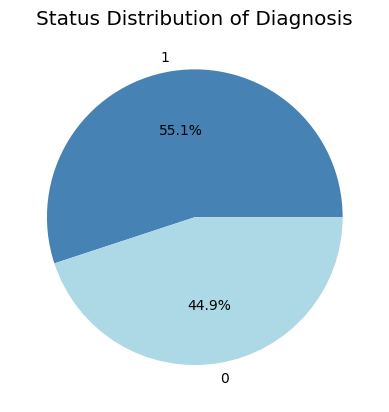

In [11]:
# melihat seberapa besar sebaran data pada fitur diagnosis
distribution_data = df['diagnosis'].value_counts()

blue_shades = [ '#4682b4', '#add8e6']

# Plot pie chart
plt.style.use('ggplot')
plt.pie(
    distribution_data, 
    labels=distribution_data.index, 
    autopct='%2.1f%%', 
    colors=blue_shades
)
plt.title('Status Distribution of Diagnosis')
plt.show()

dari output diatas diketahui bahwa :
* Sebaran data diagnosis tidak merata
* No = 44.9% dan Yes = 55.1%

### Menampilkan matix korelasinya

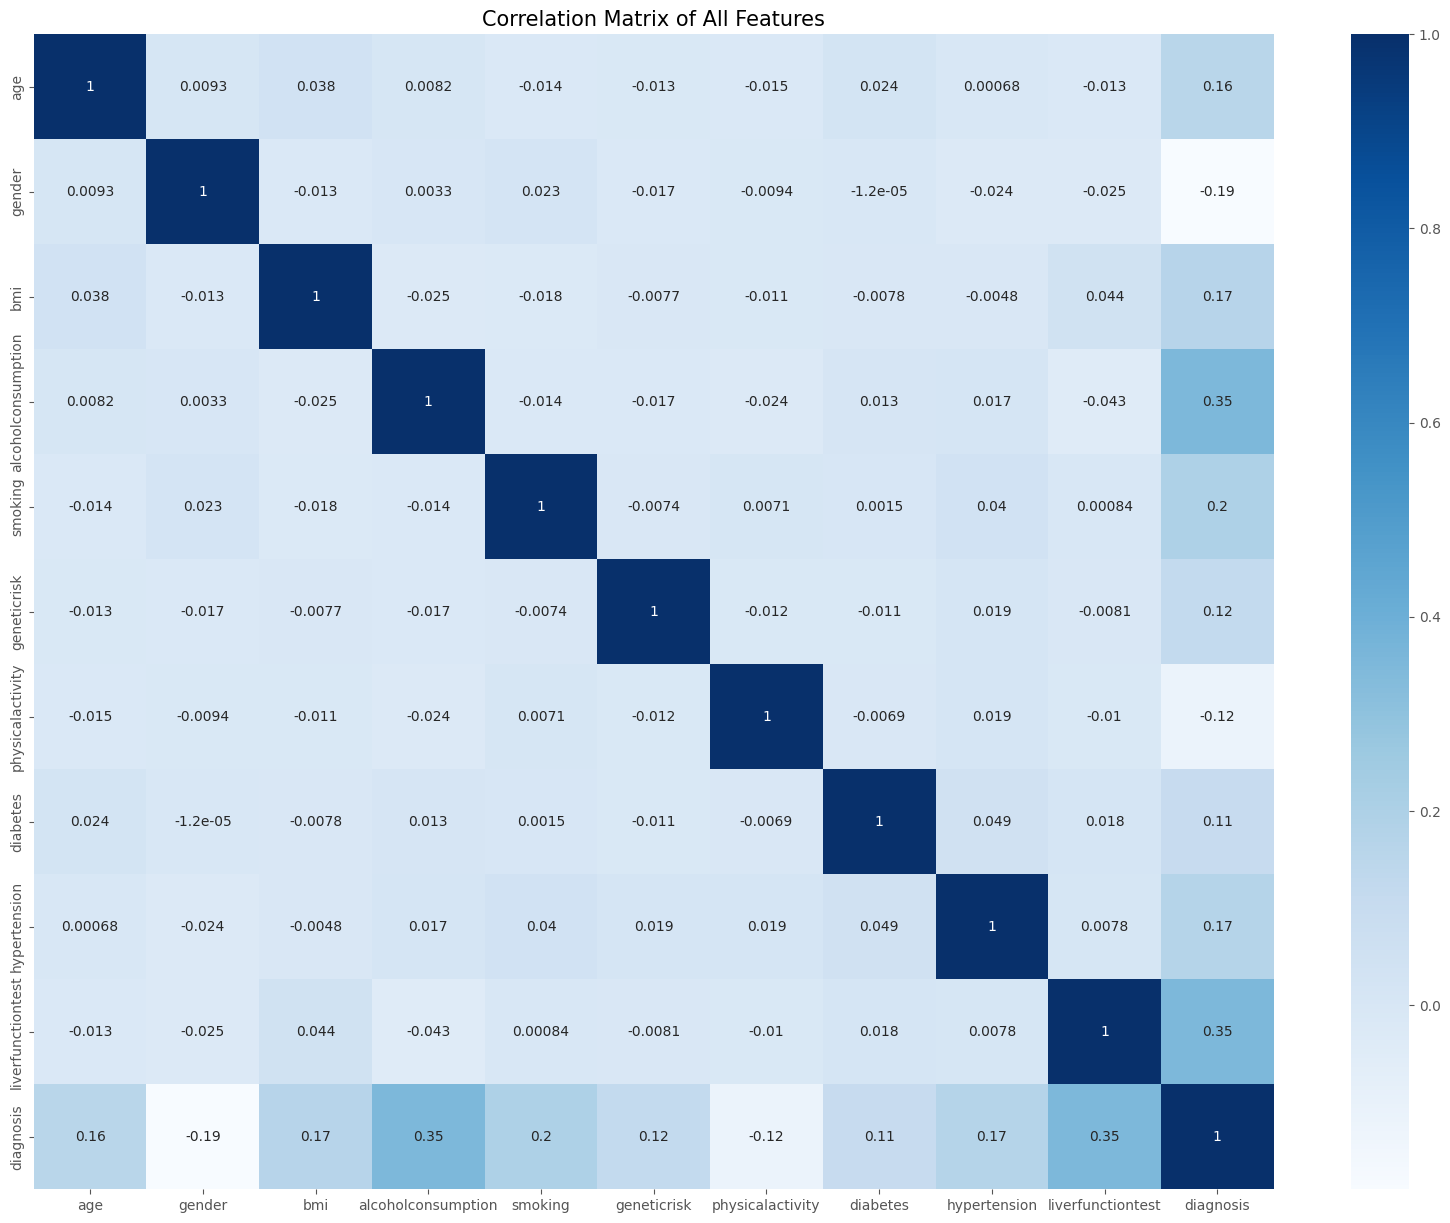

In [15]:
# menampilkan korelas dari tiap fiturnya
correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix of All Features', size=15)
plt.show()

Dari data diatas diketahui bahwa :

* Hanya sedikit fitur yang memilik korelasi
* alcoholconsumption dan liverfunctiontest memiliki korelasi yang tinggi terhadap diagnosis

# Data Preparation

Pada bagian ini kita akan melakukan empat tahap persiapan data, yaitu:

* One hot encoding untuk kategorikal feature.
* Splitting data set menjadi 75 train dan 25 test

Melakukan penggantian nilai gender, dari kategorikal menjadi numerical

In [13]:
# memasukan dataset ke dataframe terlebih dahulu
df = show_data

In [14]:

df['gender'] = df['gender'].astype(str) # memastikan gender bernilai string
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

print(show_data['gender'].head()) # menampilkan 5 teratas


0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: int32


dari output di atas dapat disimpulkan bahwa :

* kita berhasil untuk mengubah value gender dari Male & Female menjadi 0 & 1
* Male = 0 dan Female = 1 

Melakukan splitting data train dan test

In [16]:
#Kolom yang menjadi target adalah kolom price
X = df.drop(["diagnosis"],axis =1)
y = df["diagnosis"]

# pembagian Train = 75 dan Test = 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

# menampilkan data yang sudah di split
print(f'Total dataset: {len(X)}')
print(f'Total data Train: {len(X_train)}')
print(f'Total data Test: {len(X_test)}')

Total dataset: 1700
Total data Train: 1275
Total data Test: 425


dari output diatas :

* Kita berhasil memisahkan data Train dan Test
* Sample Train = 1275 & Test = 425

# Modeling

Membuat model SVM, LogisticRegression, RandomForest, KNN

In [17]:
def models(X_train, y_train):

    y_train = y_train.ravel()

    svm = SVC()
    svm.fit(X_train, y_train)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)


    return svm, lr, rf, knn

y_test = y_test.ravel()

svm, lr, rf, knn = models(X_train, y_train)

y_pred_lr = svm.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

model berhasil dibuat

# Evaluation

In [18]:
def evaluate_models(X_test, y_test, models):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')

        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    return pd.DataFrame(results)

models = {'Support Vector Machine': svm, 'Logistic Regression': lr, 'Random Forest': rf, 'KNN': knn}

results_df = evaluate_models(X_test, y_test, models)

print(results_df)

                    Model  Accuracy  Precision    Recall
0  Support Vector Machine  0.748235   0.747832  0.741517
1     Logistic Regression  0.814118   0.813119  0.810768
2           Random Forest  0.875294   0.876415  0.871602
3                     KNN  0.736471   0.734270  0.735370


## Hyperparameter Tunning

Mencari mana parameter terbaik

### Menggunakan Cross Valdation

In [19]:
fold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

### Menggunakan GridSearch

In [ ]:
def grid_search(model, fold, params, scoring):
    grid_search = GridSearchCV(model,
                               cv=fold,
                               param_grid=params,
                               scoring=scoring,
                               n_jobs=1,
                               verbose=1)
    return grid_search

In [21]:
def best_score_param(model):
    print('Best score: ', model.best_score_)
    print('Best parameter: ', model.best_params_)

## Support Vector Machine

In [40]:
svm = SVC()

svm_params = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'probability': [True, False] 
}

grid_search_svm = grid_search(svm, fold, svm_params, scoring=None)

grid_search_svm.fit(X_train, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf'],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             verbose=1)

In [45]:
best_score_param(grid_search_svm)

Best score:  0.8305967431583194
Best parameter:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'probability': True, 'shrinking': True}


In [47]:
svm = SVC(C=1, kernel='linear', gamma='scale', shrinking=True, probability=True)
svm.fit(X_train, y_train)

svm_y_pred = svm.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, svm_y_pred))
print('Precision: ', precision_score(y_test, svm_y_pred))
print('Recall: ', recall_score(y_test, svm_y_pred))


Accuracy:  0.8188235294117647
Precision:  0.8277310924369747
Recall:  0.8454935622317596


## Logistic Regression

In [49]:
lr = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'solver': ['liblinear', 'saga'],
             'C': [0.1, 1, 10],
             'l1_ratio': [0.5]}
grid_search_lr = grid_search(lr, fold, lr_params, scoring=None)

grid_search_lr.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'l1_ratio': [0.5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [50]:
best_score_param(grid_search_lr)

Best score:  0.8266745569701235
Best parameter:  {'C': 10, 'l1_ratio': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(C = 10, l1_ratio = 0.5, penalty='l2', solver='liblinear')
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, lr_y_pred))
print('Precision: ', precision_score(y_test, lr_y_pred))
print('Recall: ', recall_score(y_test, lr_y_pred))

Accuracy:  0.8188235294117647
Precision:  0.825
Recall:  0.8497854077253219


## Random Forest

In [52]:
rf = RandomForestClassifier(random_state=123)

rf_params = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15 ,20],
    'criterion' :['gini', 'entropy']
}
grid_search_rf = grid_search(rf, fold, rf_params, scoring='roc_auc_ovr')

y_train = y_train.ravel()

grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=123), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='roc_auc_ovr', verbose=1)

In [53]:
best_score_param(grid_search_rf)

Best score:  0.9361631785965264
Best parameter:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}


In [58]:
rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=20,
    max_features='sqrt',
    n_estimators=500
)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, rf_y_pred))
print('Precision: ', precision_score(y_test, rf_y_pred))
print('Recall: ', recall_score(y_test, rf_y_pred))

Accuracy:  0.88
Precision:  0.8760330578512396
Recall:  0.9098712446351931


## K-Nearest Neighbors

In [55]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn_params = {'n_neighbors' : [1,2,3,4,8,9,14,19,20,25],
              'weights' : ['uniform','distance'],
              'algorithm' : ['auto','ball_tree','kd_tree','brute']
}
grid_search_knn = grid_search(knn, fold, knn_params, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=8, weights='distance'),
             n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 8, 9, 14, 19, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [56]:
best_score_param(grid_search_knn)

Best score:  0.7615635595931163
Best parameter:  {'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'distance'}


In [59]:
knn = KNeighborsClassifier(
    n_neighbors=14,
    weights='distance',
    algorithm='auto'
)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, knn_y_pred))
print('Precision: ', precision_score(y_test, knn_y_pred))
print('Recall: ', recall_score(y_test, knn_y_pred))

Accuracy:  0.7905882352941176
Precision:  0.8103448275862069
Recall:  0.8068669527896996
